In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.express as px

In [21]:
df = pd.read_csv(r'C:\Users\91936\Desktop\Datasets\polluted countries\population-data.csv', encoding="unicode_escape")

In [22]:
df.head(5)

,population_2023,population_growth_Rate,country_name,ccn3,country_region,united_nation_Member,country_land_Area_in_Km,population_density_in_km,population_density_per_Mile,share_borders,population_Rank,mostPollutedCountries_particlePollution
0,1428627663,0.00808,India,356,Asia,True,2973190.0,480.5033,1244.5036,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",1,58.08
1,1425671352,-0.00015,China,156,Asia,True,9424702.9,151.2696,391.7884,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",2,39.12
2,339996563,0.00505,United States,840,North America,True,9147420.0,37.1686,96.2666,"CAN, MEX",3,9.04
3,277534122,0.00738,Indonesia,360,Asia,True,1877519.0,147.8196,382.8528,"TLS, MYS, PNG",4,51.71
4,240485658,0.01976,Pakistan,586,Asia,True,770880.0,311.9625,807.9829,"AFG, CHN, IND, IRN",5,65.81


In [23]:
df.isnull().sum()

population_2023                             0
population_growth_Rate                      0
country_name                                0
ccn3                                        0
country_region                              0
united_nation_Member                        0
country_land_Area_in_Km                     0
population_density_in_km                    0
population_density_per_Mile                 0
share_borders                              11
population_Rank                             0
mostPollutedCountries_particlePollution     0
dtype: int64

In [24]:
df = df.drop(['share_borders', 'mostPollutedCountries_particlePollution'], axis=1)

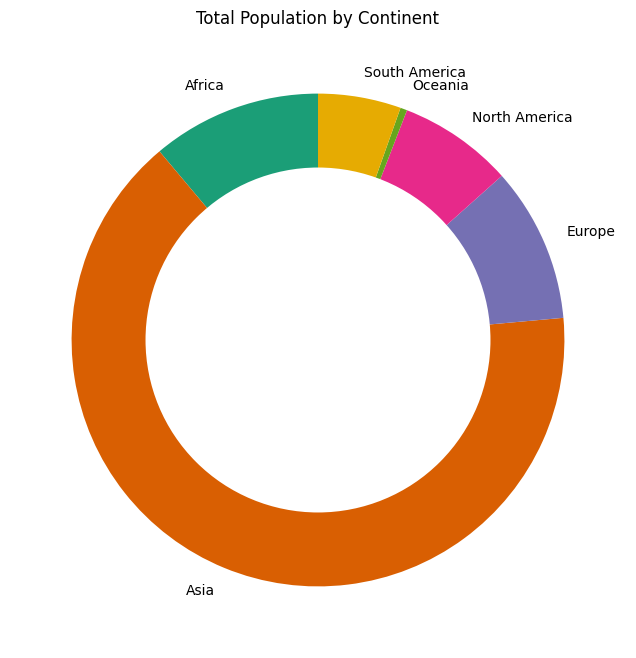

In [25]:
continent_population = df.groupby('country_region')['population_2023'].sum().reset_index()

colors = plt.cm.Dark2.colors
plt.figure(figsize=(8, 8))
plt.pie(continent_population['population_2023'], labels=continent_population['country_region'],  startangle=90,  colors=colors)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.title('Total Population by Continent')
plt.show()

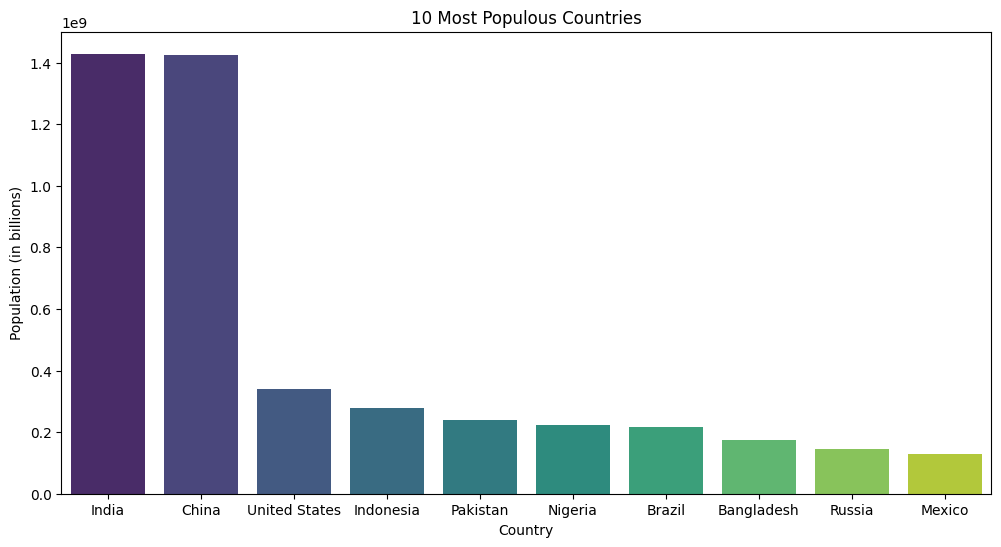

In [26]:
top_10_countries = df.sort_values(by='population_2023', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y='population_2023', x='country_name', data=top_10_countries, palette='viridis')
plt.ylabel('Population (in billions)')
plt.xlabel('Country')
plt.title('10 Most Populous Countries')
plt.show()

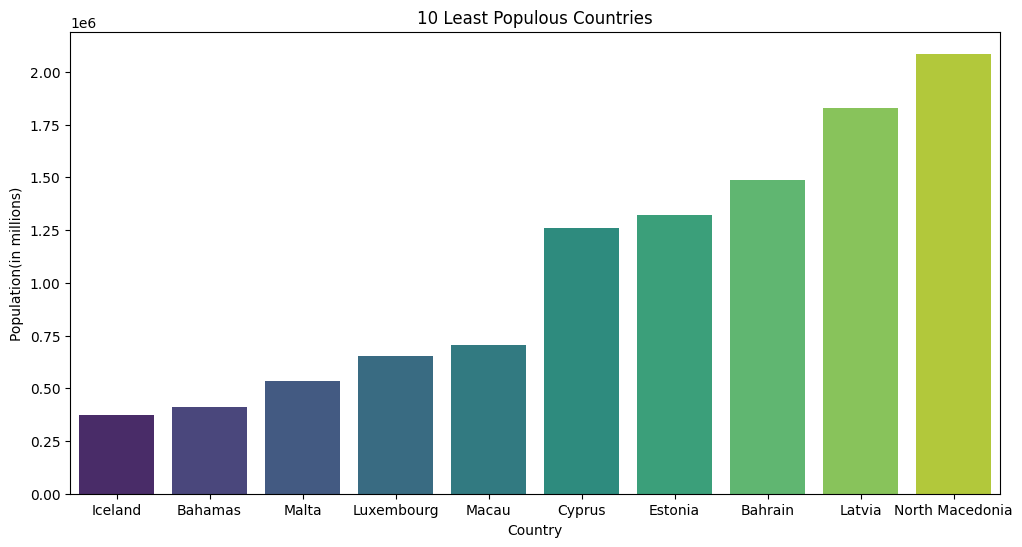

In [27]:
top_10_least_populous_countries = df.sort_values(by='population_2023').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y='population_2023', x='country_name', data=top_10_least_populous_countries, palette='viridis')
plt.ylabel('Population(in millions)')
plt.xlabel('Country')
plt.title('10 Least Populous Countries')
plt.show()

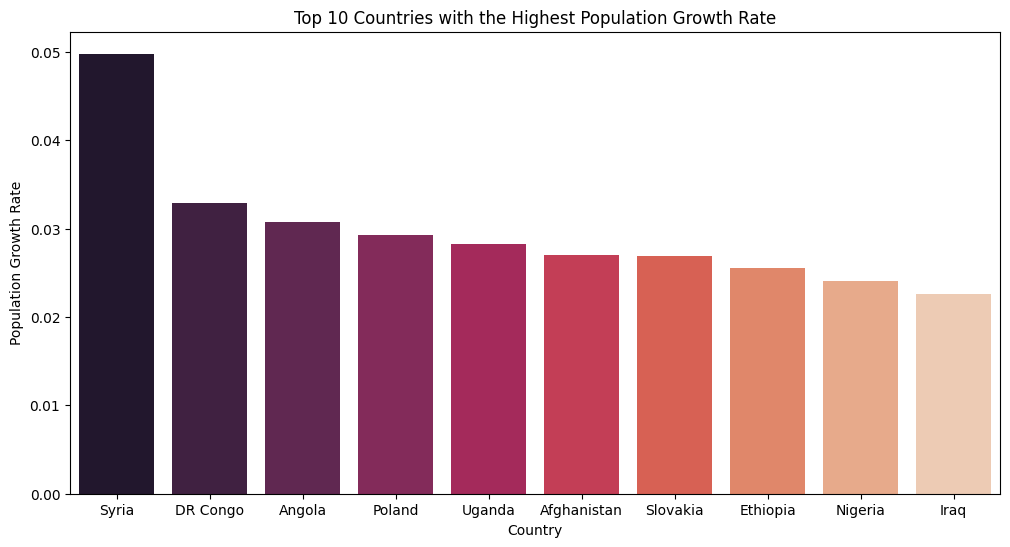

In [28]:
top_10_population_growth_countries = df.sort_values(by='population_growth_Rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y='population_growth_Rate', x='country_name', data=top_10_population_growth_countries, palette='rocket')
plt.ylabel('Population Growth Rate')
plt.xlabel('Country')
plt.title('Top 10 Countries with the Highest Population Growth Rate')
plt.show()

In [35]:
df['population_density'] = df['population_2023'] / df['country_land_Area_in_Km']

top_10_population_density = df.sort_values(by='population_density', ascending=False).head(10)

top_10_population_density.reset_index(drop=True, inplace=True)
top_10_population_density.index += 1

top_10_population_density = top_10_population_density.rename(columns={'country_name': 'Country', 'population_density': 'Population per mile'})

print(top_10_population_density[['Country', 'Population per mile']])

        Country  Population per mile
1         Macau         21402.705167
2     Singapore          8377.051532
3     Hong Kong          7134.865714
4       Bahrain          1892.368153
5         Malta          1672.075000
6    Bangladesh          1328.680333
7        Taiwan           660.918750
8   South Korea           530.574375
9   Netherlands           523.264004
10        India           480.503319


In [34]:
max_populous_countries_index = df.groupby('country_region')['population_2023'].idxmax()

most_populous_countries = df.loc[max_populous_countries_index, ['country_region', 'country_name', 'population_2023']]

most_populous_countries.reset_index(drop=True, inplace=True)
most_populous_countries.index += 1

most_populous_countries = most_populous_countries.rename(columns={
    'country_region': 'Continent',
    'country_name': 'Country',
    'population_2023': 'Population'
})

print(most_populous_countries)

       Continent        Country  Population
1         Africa        Nigeria   223804632
2           Asia          India  1428627663
3         Europe         Russia   144444359
4  North America  United States   339996563
5        Oceania      Australia    26439111
6  South America         Brazil   216422446
